# In this notebook, I have catogorized customers into segments according to their spending in a mall and their income using K-Means Clustering algorithm

### Author: Abhisek Saha
### Data credit: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
#### Idea credit = Siddhardhan youtube channel

In [1]:
!ls

Customer_segmentation_analysis.ipynb  Mall_Customers.csv


In [2]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There is no missing values in the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Data is well distributed, mean and median are very close for all the features

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 1296x1008 with 0 Axes>

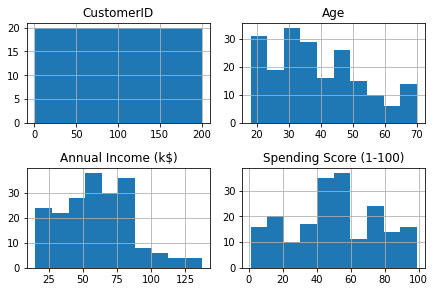

In [8]:
plt.figure(figsize=(18,14))
df.hist(bins=10)
plt.tight_layout(pad=0.5, h_pad=1.2, w_pad=1.0)
plt.show()

<AxesSubplot:>

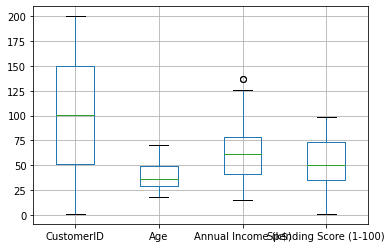

In [9]:
df.boxplot()

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df1 = df.drop(['CustomerID', 'Age', 'Gender'], axis=1)

In [12]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
X = df1.values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.cluster import KMeans

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [15]:
kmeans = KMeans(n_clusters=1, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=1, random_state=42)

In [16]:
kmeans.inertia_

269981.28000000014

### Choosing the number of clusters

#### wcss->within cluster sum of squares

In [17]:
wcss = []

for nclusters in range(1,11):
    kmeans = KMeans(n_clusters=nclusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

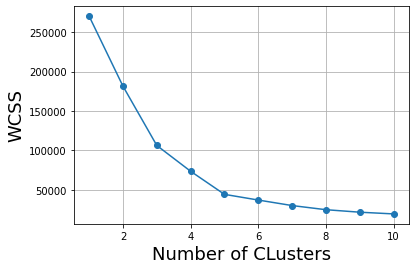

In [18]:
plt.plot(range(1,11), wcss, 'o-')
plt.xlabel("Number of CLusters", fontsize=18)
plt.ylabel("WCSS", fontsize=18)
plt.grid()
plt.show()

#### last major deflection at 5 => optimum number of cluster=5

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [20]:
Y = kmeans.fit_predict(X)
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

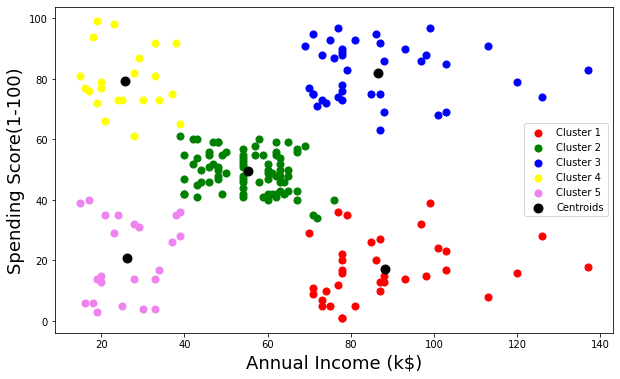

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, color='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, color='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, color='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, color='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, color='violet', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, color='black', label='Centroids')
plt.legend()
plt.xlabel("Annual Income (k$)", fontsize=18)
plt.ylabel("Spending Score(1-100)", fontsize=18)
plt.show()